In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [2]:
data=pd.read_csv("Battery_RUL.csv")
data

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [3]:
data.shape

(15064, 9)

In [4]:
data.info

<bound method DataFrame.info of        Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0              1.0             2595.30             1151.488500   
1              2.0             7408.64             1172.512500   
2              3.0             7393.76             1112.992000   
3              4.0             7385.50             1080.320667   
4              6.0            65022.75            29813.487000   
...            ...                 ...                     ...   
15059       1108.0              770.44              179.523810   
15060       1109.0              771.12              179.523810   
15061       1110.0              769.12              179.357143   
15062       1111.0              773.88              162.374667   
15063       1112.0           677537.27           142740.640000   

       Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                          3.670                    3.211           5460.001   
1              

In [5]:
data.head

<bound method NDFrame.head of        Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0              1.0             2595.30             1151.488500   
1              2.0             7408.64             1172.512500   
2              3.0             7393.76             1112.992000   
3              4.0             7385.50             1080.320667   
4              6.0            65022.75            29813.487000   
...            ...                 ...                     ...   
15059       1108.0              770.44              179.523810   
15060       1109.0              771.12              179.523810   
15061       1110.0              769.12              179.357143   
15062       1111.0              773.88              162.374667   
15063       1112.0           677537.27           142740.640000   

       Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                          3.670                    3.211           5460.001   
1                

In [6]:
data.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

 **linear regression**

In [7]:
features = data.drop("Cycle_Index", axis=1).drop("RUL", axis=1)
target = data["RUL"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=40)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the testing set
predictions = model.predict(x_test)

# Evaluate model performance
print("MSE:", mean_squared_error(y_test, predictions))
print(f"R squared: {r2_score(y_test, predictions) * 100:.2f}%")

MSE: 22617.309547196477
R squared: 78.84%


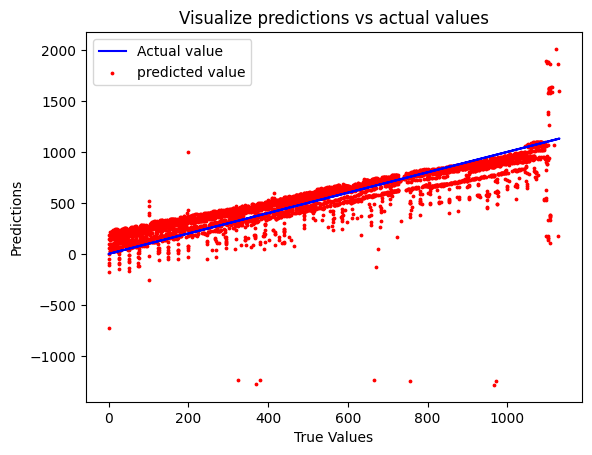

In [8]:
# Visualize predictions vs actual values
plt.plot(y_test, y_test, label="Actual value", color='blue')
plt.scatter(y_test, predictions, label="predicted value", s=3, color='red')
plt.title("Visualize predictions vs actual values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()
plt.show()


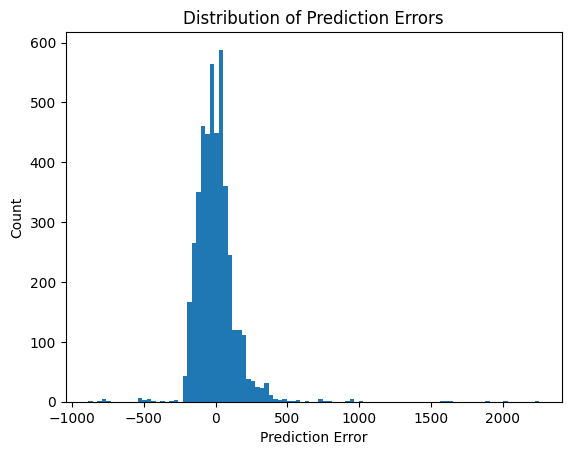

In [9]:
# Calculate the errors
errors = y_test - predictions

plt.hist(errors, bins=100)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.show()

Polynomial Features:
Allowing the model to capture non-linear relationships by adding polynomial features.

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model.fit(x_train_poly, y_train)
predictions_poly = model.predict(x_test_poly)

print("MSE (Polynomial):", mean_squared_error(y_test, predictions_poly))
print(f"R squared (Polynomial): {r2_score(y_test, predictions_poly) * 100:.2f}%")


MSE (Polynomial): 4986.519564301458
R squared (Polynomial): 95.34%


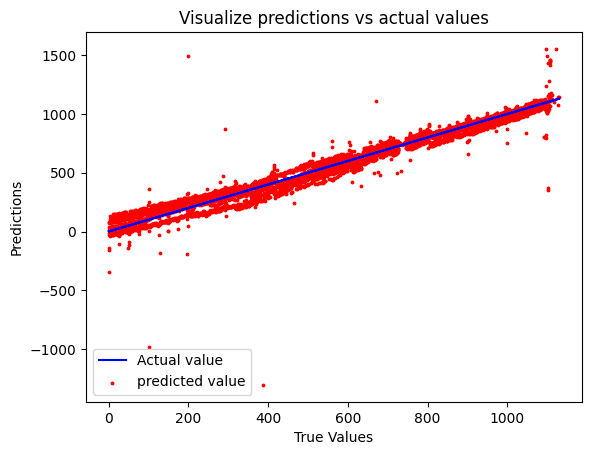

In [11]:
plt.plot(y_test, y_test, label="Actual value", color='blue')
plt.scatter(y_test, predictions_poly, label="predicted value", s=3, color='red')
plt.title("Visualize predictions vs actual values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()
plt.show()


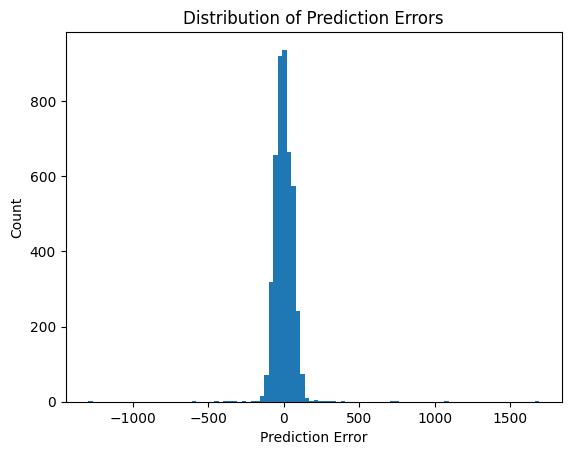

In [12]:
# Calculate the errors
errors = y_test - predictions_poly

plt.hist(errors, bins=100)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.show()

Feature Selection:
Identify and keep only the most relevant features. You can use techniques like recursive feature elimination (RFE) or feature importance from tree-based models.

In [13]:
from sklearn.feature_selection import RFE

# Example of using RFE for feature selection
rfe = RFE(model, n_features_to_select=10)
x_train_rfe = rfe.fit_transform(x_train, y_train)
x_test_rfe = rfe.transform(x_test)

model.fit(x_train_rfe, y_train)
predictions_rfe = model.predict(x_test_rfe)

print("MSE (RFE):", mean_squared_error(y_test, predictions_rfe))
print(f"R squared (RFE): {r2_score(y_test, predictions_rfe) * 100:.2f}%")


MSE (RFE): 22617.309547196477
R squared (RFE): 78.84%


Transform Target Variable:
If the relationship between features and the target is not linear, consider transforming the target variable. Common transformations include log transformations.

In [14]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

model.fit(x_train, y_train_log)
predictions_log = model.predict(x_test)

print("MSE (Log-transformed):", mean_squared_error(y_test_log, predictions_log))
print("R squared (Log-transformed):", r2_score(y_test_log, predictions_log))



MSE (Log-transformed): 0.3841541139577495
R squared (Log-transformed): 0.614987563302559
